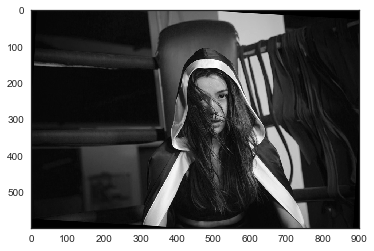

In [33]:
%matplotlib inline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from scipy.linalg import solve
import seaborn as sns
sns.set_style("white")
im = Image.open('fa.jpeg')
im = np.asarray(im.convert('L'))
plt.imshow(im)
plt.gray()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


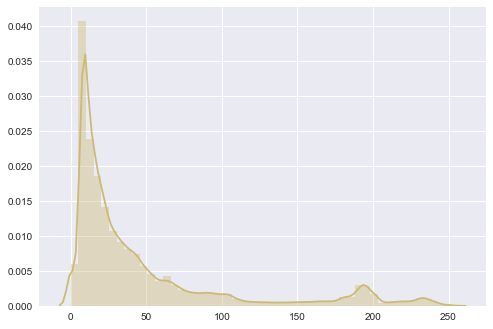

In [5]:
sns.set_color_codes()
ax = sns.distplot(im.flatten(), color="y")

In [6]:
print(ax)

Axes(0.125,0.125;0.775x0.755)


In [25]:
L = 256
hist, bin_edges = np.histogram(im.flatten(), density=False,bins=L-1,range=(0,L-1))
print(hist,bin_edges)

[14222   877   228   170   236   504  2478 20910 42013 29786 16001 12818
 12484 12827 13507 13562 12313  9889  8572  9768 10264  9176  8568  7691
  7017  6226  6172  6091  5814  5672  5645  5338  5140  4878  4758  4736
  4674  4549  4375  4260  4167  4118  4289  4077  4076  3694  3396  3221
  3158  2930  2850  2590  2632  2567  2414  2204  2103  1992  1950  1894
  1914  1935  1872  2051  1994  1962  2000  1720  1712  1591  1644  1396
  1351  1354  1255  1174  1093  1118  1085  1034   999   997  1001   961
   984  1000   929   990   995  1000   977  1048  1014   998   954   935
   903   901   949   831   824   890   882   944  1014   944   884   629
   606   540   519   445   497   400   376   364   321   311   323   291
   302   285   297   261   279   278   295   262   264   259   290   250
   235   244   237   264   254   279   246   273   221   227   270   262
   261   282   250   260   260   267   265   259   311   275   270   297
   309   277   307   294   319   286   326   338   

In [35]:
Accumulate_hist = np.add.accumulate(hist)
S = (L-1)/(im.shape[0]*im.shape[1])*Accumulate_hist

[ 14222  15099  15327  15497  15733  16237  18715  39625  81638 111424
 127425 140243 152727 165554 179061 192623 204936 214825 223397 233165
 243429 252605 261173 268864 275881 282107 288279 294370 300184 305856
 311501 316839 321979 326857 331615 336351 341025 345574 349949 354209
 358376 362494 366783 370860 374936 378630 382026 385247 388405 391335
 394185 396775 399407 401974 404388 406592 408695 410687 412637 414531
 416445 418380 420252 422303 424297 426259 428259 429979 431691 433282
 434926 436322 437673 439027 440282 441456 442549 443667 444752 445786
 446785 447782 448783 449744 450728 451728 452657 453647 454642 455642
 456619 457667 458681 459679 460633 461568 462471 463372 464321 465152
 465976 466866 467748 468692 469706 470650 471534 472163 472769 473309
 473828 474273 474770 475170 475546 475910 476231 476542 476865 477156
 477458 477743 478040 478301 478580 478858 479153 479415 479679 479938
 480228 480478 480713 480957 481194 481458 481712 481991 482237 482510
 48273

In [44]:
new_pic = np.zeros(im.shape)
it = np.nditer(im,flags=['multi_index'],op_flags=['readonly'])
while not it.finished:
    new_pic[it.multi_index[0]][it.multi_index[1]] = S[it[0]]
    it.iternext()

[[6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 ..., 
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]]


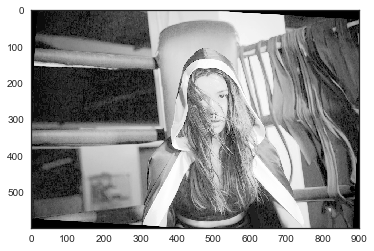

In [47]:
print(new_pic.astype(np.uint8))
plt.imshow(new_pic.astype(np.uint8))
plt.gray()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


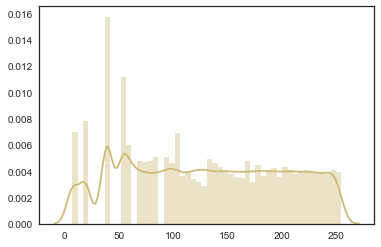

In [48]:
ax = sns.distplot(new_pic.flatten(), color="y")